<a href="https://colab.research.google.com/github/jp588/a1-1/blob/main/a1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The first homework assignment for CSE427

## Notebook Set Up
click the `File` and select the `save a copy in drive`, then rename the notebook as `CSE427-Assignment1-YOUR_NETID` and then you can edit the notebook

## Submission Instruction
Before you submit this assignment click the `Runtime` select the `Restart and run all` to make sure everything is fine. 

Create a share link with editing permission and submit the link to canvas.

## Resource
If you have some problems about the usage of pandas you can check the [pandas guide](https://pandas.pydata.org/docs/user_guide/index.html).

If you don't know about the markdown, you cen check the [basic Syntax](https://www.markdownguide.org/basic-syntax/). 

You can use latex for the math or write the answer by hand and then upload the picture. 

You can also write by hand and then use [mathpix](https://mathpix.com) to convert to latex. mathpix is very powerful


In [1]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


### Download the data you will use in this assigment

In [2]:
!gdown 1fqO7YgnyvWD3pA-BgCLATOKIlf_TTOII
!gdown 1pJ-BD_y630AfhyGlQDJwgCA_WjLndBc2

Downloading...
From: https://drive.google.com/uc?id=1fqO7YgnyvWD3pA-BgCLATOKIlf_TTOII
To: /content/Febrile_Seizures.txt
100% 325M/325M [00:05<00:00, 64.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pJ-BD_y630AfhyGlQDJwgCA_WjLndBc2
To: /content/problem2_raw_data.txt
100% 9.90k/9.90k [00:00<00:00, 11.6MB/s]


## Problem 0 - Reflection  

### 1. Describe how to convert raw genotype data into a numeric matrix of genotypes. (1 point)

Your answer: 

For each individual in a study, at every site in their genome, count the number of 'minor allels' (least common allel) present at that site. Because humans are diploid, there can be 0, 1, or 2 instances of the minor allel at a given site. By doing this, each individual's genome is converted into an array of 0s, 1s, and 2s. These genome arrays for all individuals in a study can be turned into the rows of a matrix. This results in a numeric matrix of genotypes for the study population.

### 2.Name one difference between linear regression and logistic regression. (1 point)

Your answer: 

Linear regression is best for continuous variables, and logistic regression is well suited for binary variables because it is bounded by 0 and 1. 

### 3.What is the Bonferroni correction? Why we need to do Bonferroni correction in a real world analysis? (1 point)
Your answer: 

We need to do Bonferroni correction because when you are doing multiple hypothesis tests (ex. for thousands of SNP), the likelihood of incorrectly rejecting at least one null hypothesis (type-1 error) increases, so a p-value of 0.05 becomes far too generous, and a corrected, lower threshold should be used instead, which is what Bonferroni gives us.

## Problem 1 - Logistic Regression
Recall the logistic regression model
$$
p\left(y_i=1 \mid \mathbf{x}, \mathbf{w}\right)=\frac{\exp \left(w_0+\ldots+x_{i j} w_j\right)}{1+\exp \left(w_0+\ldots+x_{i j} w_j\right)}\\
p\left(y_i=0 \mid \mathbf{x}, \mathbf{w}\right)=1-p\left(y_i=1\mid \mathbf{x},\mathbf{w}\right)=1-\frac{\exp \left(w_0+\ldots+x_{i j} w_j\right)}{1+\exp \left(w_0+\ldots+x_{i j} w_j\right)}
$$
Starting from the likelihood function for this model, derive the update equation for fitting parameters of logistic regression. In other words, at each time step in a gradient descent algorithm, what equation is used to update the weights of the model?
Show all steps, and use text to describe equations as needed. Hint: look at the lecture slides. 

Include the following steps:
1. Write the expression for full likelihood of data under the model for $\mathrm{N}$ examples. (2 points)
2. Write down the objective function that is minimized. Hint: Take the negative of the log likelihood function, and simplify the resulting function. (2 points)
3. Recall that in gradient descent, we iteratively solve for an update parameter at time t, $w_j^t=w_j^{t-1}-\alpha\frac{\partial{LL}}{\partial{w_j}}$ Write the update rule for gradient descent. That is, show $\frac{\partial{LL}}{\partial{w_j}}$ for the logistic regression objective function. (3 points)

## Your answer:
\begin{align*}
&\text{for convenience we define } \sigma(\mathbf{w^T x_i}) = \frac{\exp \left(w_0+\ldots+x_{i j} w_j\right)}{1+\exp \left(w_0+\ldots+x_{i j} w_j\right)} = \frac{1}{1+\exp \left(-1(w_0+\ldots+x_{i j} w_j)\right)}\\
&\text{NOTE: to use this matrix notation we assume a row of 1s has been added to X to make the bias work}\\
&\text{Likelihood of model w/ N examples: }L(\mathbf{y}| X, \mathbf{w}) = \Pi_{i=1}^N p(y_i = 1 | \mathbf{x_i, w})^{y_i}(1 - p(y_i = 1 | \mathbf{x_i, w}))^{1-y_i} \\
&\text{The objective function that is minimized:}\\
&\text{Log likelihood: } LL(\mathbf{w}) = \sum_i^N y_i* log(p(y_i=1 |\mathbf{x_i,w})) + (1 - y_i) * log (1 - p(y_i=1 |\mathbf{x_i,w})) \\
&NLL(\textbf{w})= \sum_i^N  (y_i - 1) * log (1 - p(y_i=1 |\mathbf{x,w})) - y_i* log(p(y_i=1 |\mathbf{x,w}))\\
&NLL(\textbf{w})= \sum_i^N  (y_i - 1) * log (1 - \sigma(\mathbf{w^Tx_i})) - y_i* log(\sigma(\mathbf{w^Tx_i}))\\
\end{align*}

Gradient decent derivation: \\
\begin{align*}
    \frac{\delta LL}{dw_j} &= \sum_i^N \frac{\delta LL}{dw_j}\Big[ y_i* log(p(y_i=1 |\mathbf{x_i,w})) + (1 - y_i) * log (1 - p(y_i=1 |\mathbf{x_i,w})) \Big]\\
    &\text{The derivative of a sum is equal to the sum of derivatives, so we first focus on the derivative of the Log Likelihood for a fixed i.}\\
    &= y_i* \frac{\delta}{dw_j}(log(\sigma(\mathbf{w^Tx_i}))) + (1 - y_i)*  \frac{\delta}{dw_j}( log(1 - \sigma(\mathbf{w^Tx_i}))) \\
    &= \Big[ \frac{y_i}{\sigma(\mathbf{w^Tx_i})} - \frac{1-y_i}{1-\sigma(\mathbf{w^Tx_i})}\Big]*\frac{\delta}{dw_j}(\sigma(\mathbf{w^Tx_i})) \text{ (derivate of log)}\\
\end{align*}
\begin{align*}
    \text{ As an aside, we calculate }& \frac{\delta}{\delta w_j} (1-\sigma(\mathbf{w^Tx_i})):\\
    & = \frac{\delta}{\delta w_j}(\frac{1}{1+e^{\mathbf{-w^T x_i}}})\\
    & = -\frac{1}{(1+e^{\mathbf{-w^T x_i}})^2}*(e^{-\mathbf{w^Tx_i}})*-1*x_i\\
    & = \frac{1}{(1+e^{\mathbf{-w^Tx_i}})^2}*(e^{-\mathbf{w^Tx_i}})*x_i\\
    % & = \frac{1}{(1+e^{\mathbf{-w^Tx_i}})^2}* (1 + e^{-\mathbf{w^T x_i}} - 1) x_i\\
    & = \frac{1}{(1+e^{\mathbf{-w^Tx_i}})} * \frac{(1 + e^{-\mathbf{w^T x_i}} - 1)}{(1+e^{\mathbf{-w^Tx_i}})} x_i\\
    & = \frac{1}{(1+e^{\mathbf{-w^Tx_i}})} * \Big(\frac{1 + e^{\mathbf{-w^Tx_i}}}{1 + e^{\mathbf{-w^Tx_i}}} - \frac{1}{1 + e^{\mathbf{-w^Tx_i}}}\Big)x_i\\
    &= \frac{1}{(1+e^{\mathbf{-w^Tx_i}})} * \Big( 1 -\frac{1}{1 + e^{\mathbf{-w^Tx_i}}}\Big)x_i\\
    &= \sigma(\mathbf{w^Tx_i})(1-\sigma(\mathbf{w^Tx_i}))x_i\\
\end{align*}
We now continue the derivation of Gradient Decent:
\begin{align*}
    &= \Big[ \frac{y_i}{\sigma(\mathbf{w^Tx_i})} - \frac{1-y_i}{1-\sigma(\mathbf{w^Tx_i})}\Big]*\frac{\delta}{dw_j}(\sigma(\mathbf{w^Tx_i}))\\
    &= \Big[ \frac{y_i}{\sigma(\mathbf{w^Tx_i})} - \frac{1-y_i}{1-\sigma(\mathbf{w^Tx_i})}\Big]*\sigma(\mathbf{w^Tx_i})(1-\sigma(\mathbf{w^Tx_i}))x_i\\
    &= (y_i(1-\sigma(\mathbf{w^Tx_i})) - (1-y_i)\sigma(\mathbf{w^Tx_i}))x_i\\
    &= (y_i - \sigma(\mathbf{w^Tx_i}))x_i
\end{align*}

We sum over all datapoints $x_i$ to get our final answer:

Final Answer: $\frac{\delta LL}{dw_j} = \sum_{i=1}^N\Big((y_i - \sigma(\mathbf{w^Tx_i}))x_i\Big)$


## Problem 2 - Linear Regression and Logistic Regression

In this problem, we will use real data to fit linear regression and logistic regression models. The data is in the file `problem2_raw_data.txt`. The first column is the continuous phenotype and the second is the genotype $TA, AA, TT$. 



### Problem 2 (a) - fit Linear Regression
Perform the following step and show your code:
1. Load the data into a pandas dataframe. (1 point)
2. Convert the genotype into a numeric value by counting number of the minor allele (1 point)
3. Use a scatter plot to visualize the data. Plot genotype value on x-axis and phenotype value on y-axis.(1 point)
4. Next, fit a linear regression model to the data to get the values for the unknown parameters. Show your code. (1 point)
5. Finally, write down the values for the two parameters. (1 point) 

Note: My answers are embeded in the code

In [3]:
import pandas as pd
import numpy as np

# load raw data
raw_data = pd.read_csv('./problem2_raw_data.txt', sep='\t', header=0)

raw_data.head(5)

,PHENO,GENO
0,1.8844,TT
1,1.8472,TT
2,2.2440,AT
3,2.2346,AT
4,1.8919,TT


In [4]:
# find the minor allele
raw_data['GENO'].value_counts() # A appears to be the minor allel T

TT    646
AT    315
AA     39
Name: GENO, dtype: int64

In [5]:
# Encode the Genotype into 0, 1, 2 by counting the minor allele
# Finish Your Code
raw_data['X']  = raw_data['GENO'].map({'TT':0, 'AT':1, 'AA':2}) 
raw_data.head()


,PHENO,GENO,X
0,1.8844,TT,0
1,1.8472,TT,0
2,2.2440,AT,1
3,2.2346,AT,1
4,1.8919,TT,0


Text(0, 0.5, 'PHENO')

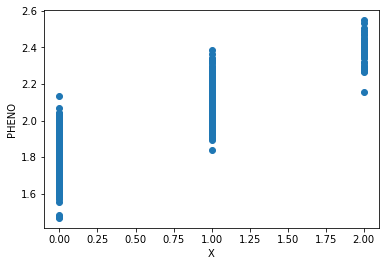

In [6]:
# scatter plot for X and PHENO

import matplotlib.pyplot as plt

# use plt.scatter 
plt.scatter(raw_data['X'], raw_data['PHENO'])
plt.xlabel('X')
plt.ylabel('PHENO')

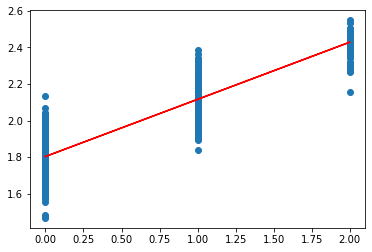

In [7]:
# Fit a linear regression model

import sklearn.linear_model as lm

# Finish your code here
X = raw_data['X'].values.reshape(-1, 1)
y = raw_data['PHENO'].values.reshape(-1, 1)

# FINISH YOUR CODE Hint: Use lm.linearRegression
model = lm.LinearRegression()

# FINISH YOUR CODE Hint: Use model.fit() 
model.fit(X, y)

# Plot the fitted line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

In [8]:
# print the model parameters
print(model.coef_, model.intercept_)

[[0.31311291]] [1.80289853]


### Explain your result here: 
This model suggests that an the 'A' allele at the measured location is associated with a greater expression of the phenotype.




### Problem 2 (b) - fit Logistic Regression

In this equestion, we use the same data as in Question (a) to fit logistic regression models, and derive the p-value for association between SNP genotype and the phenotype. Please show work for each step below. Look below for hints. 

1. Convert the phenotype data into binary values (0 or 1) by setting the threshold to the mean of the phenotype. (1 point)

2. Fit two separate logistic regression models to the data, one that use the SNP values as a covariate (Full Model) and one that does not use the SNP information, and only includes an intercept term (Reduced Model). Then show  the likelihood values according to the Full Model and the Reduced Model. (1 point)

3.  Compute the value of the LRT test-statistics (called $\lambda$ below). (1 point)

4. Compute the p-value using LRT test given the likelihood. (1 point)

5. Is the result statistically significant? why? (1 point)

Note: answers to questions 1-4 are embeded in the code



\\
Data likelihood according to the Full Model:$$
L(\mathbf{y} \mid X, \mathbf{w})=\prod_i\left(\frac{e^{w_0+w_1 x_i}}{1+e^{w_0+w_1 x_i}}\right)^{y_i}\left(1-\frac{e^{w_0+w_1 x_i}}{1+e^{w_0+w_1 x_i}}\right)^{\left(1-y_i\right)}
$$

Data likelihood according to the Reduced Model:
$$
L(\mathbf{y} \mid w)=\prod_i\left(\frac{e^{w_0}}{1+e^{w_0}}\right)^{y_i}\left(1-\frac{e^{w_0}}{1+e^{w_0}}\right)^{1-y_i}
$$

The Likelihood Ratio Test (LRT) is a statistical test used to compare two models. The test statistic is two times the difference in *log-likelihoods* between the two models (Full and Reduced models). The test statistic is distributed as a chi-square distribution with degrees of freedom equal to the difference in the number of parameters between the two models. The test statistic is calculated as follows:

$$
\begin{aligned}
\mathrm{LR} &=2\times\mathrm{log} \frac{L\left(\mathbf{y} \mid \mathbf{w}_{\mathrm{full}}\right)}{L\left(\mathbf{y} \mid \mathbf{w}_{\mathrm{reduced}}\right)} \\
&=2\times \mathrm{log} \frac{\prod_{i=1}^{N} p\left(y_{i} \mid \mathbf{x}_{i}, \mathbf{w}_{\mathrm{full}}\right)}{\prod_{i=1}^{N} p\left(y_{i} \mid \mathbf{x}_{i}, \mathbf{w}_{\mathrm{reduced}}\right)} \\
\end{aligned}
$$

In [9]:
def predict_prob(x, coef, intercept):
    # predict the probability of PHENO=1
    # Finish your code here
    predict = np.exp(intercept + x*coef)/(1 + np.exp(intercept + x*coef))
    return predict.squeeze()

In [10]:
import math 

# convert the continuous Phenotype into 0, 1 (0: below mean, 1: above mean) as the colum Y
mean = raw_data['PHENO'].mean()
raw_data['Y'] = np.where(raw_data['PHENO'] >= mean, 1, 0) # TODO equal to or not?

# Fit a logistic regression model
# Y = raw_data['Y'].values.reshape(-1,1) I am choosing to not reshape in this way to avoid a warning
y = raw_data['Y']

# FINISH YOUR CODE Hint:use lm.LogisticRegression() and full_model.fit(X, Y)
full_model = lm.LogisticRegression() # we are not using any penalty currently


full_model.fit(X, y)
print('the fitted full model parameters:', full_model.coef_, full_model.intercept_)

# Calculate the log-likelihood of the fitted model

full_model_predict_prob = predict_prob(X, full_model.coef_, full_model.intercept_)
# # Calculate the log-likelihood of the fitted model
lnL_fullmodel = np.sum(y*np.log(full_model_predict_prob) + (1-y)*np.log(1- full_model_predict_prob))

the fitted full model parameters: [[5.37550594]] [-1.99463747]


In [11]:
Null = np.zeros((X.shape))

# FINISH YOUR CODE Hint:use lm.LogisticRegression() and full_model.fit(Null, Y)
reduced_model = lm.LogisticRegression()
reduced_model.fit(Null, y)
print('the fitted reduced model parameters:', reduced_model.coef_, reduced_model.intercept_)

the fitted reduced model parameters: [[0.]] [-0.31866964]


In [12]:
# Calculate the log-likelihood of the reduced model
# The reduced model only has an intercept term

reduced_model_predict_prob = predict_prob(X, reduced_model.coef_, reduced_model.intercept_)

lnL_reducedmodel = np.sum(y*np.log(reduced_model_predict_prob) + (1-y)*np.log(1- reduced_model_predict_prob))
# Calculate the likelihood ratio test statistic
lamda = 2 * (lnL_fullmodel - lnL_reducedmodel)


In [13]:
print(lamda)

854.2830405638159


In [14]:
# Chi-square distribution with 1 degree of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(lamda, 1)

In [15]:
# the p-value might be very small even equal to zero due the numerical precision
print('p-value: ', p_value)

p-value:  0.0


This p-value is smaller than the conventional threshold of 0.05. The p-value is very small (so small that it appears as zero!). Therefore, the likelihood that of getting a association this strong or stronger under the null hypothesis has a super tiny probability. This means that the result is statistically significant. This suggests that the SNP is associated with the measured phenotype.

## Problem 3 - P-value threshold and Boneferroni correction
In this problem, we provide a recent published GWAS dataset - [genome-wide meta-analysis of febrile seizures published in Skotte et al. 2022 ](https://www.danishnationalbiobank.com/gwas/febrile-seizures-2022)

The summary statistics file contains results from GWAS discovery analysis of febrile seizures (n=4502) versus controls (n=51049). The file provides information on chromosome, genomic position (NCBI build 37), rsID, effect allele, other allele, odds ratio for the effect allele, standard error, and P value, at approximately 6.8 million variants passing quality control.

A febrile seizure, also known as a fever fit or febrile convulsion, is a seizure associated with an increased body temperature but without any intracranial infection. They most commonly occur in children between the ages of 6 months and 5 years with a higher incidence around 18 month of age. There are two types: simple febrile seizures and complex febrile seizures. Febrile seizures are triggered by fever, typically due to a viral infection. The underlying mechanism is not fully known, but it is thought to involve genetics, environmental factors, brain immaturity, and inflammatory mediators.

In [16]:
# load the GWAS data
GWAS_data = pd.read_csv('./Febrile_Seizures.txt', sep=' ', header=0)
GWAS_data.head(5)

,chromosome,pos,rsid,eff_allele,alt_allele,BETA,SE,P
0,1,100000012,rs10875231,T,G,-0.0196,0.0262,0.45540
1,1,100000827,rs6678176,T,C,0.0106,0.0246,0.66530
2,1,100000843,rs78286437,T,C,-0.1132,0.0486,0.01972
3,1,100000989,rs146963890,A,ATC,-0.1085,0.0497,0.02908
4,1,100001201,rs76909621,T,G,-0.0011,0.0379,0.97730


In [17]:
GWAS_data['-logp'] = -1*np.log10(GWAS_data['P']) # Hint Use np.log10()


In [18]:
# Calculate the cumulative position
running_pos = 0

cumulative_pos = []

for chrom, group_df in GWAS_data.groupby('chromosome'):  
    cumulative_pos.append(group_df['pos'] + running_pos)
    running_pos += group_df['pos'].max()
    
GWAS_data['cumulative_pos'] = pd.concat(cumulative_pos)

#### 3 (a) - How many significant SNPs were found in the above analysis? Use an uncorrected p-value of 0.05. Is the result reasonable? (2 points)


In [19]:
# Finish you analysis here
n_uncorrected = GWAS_data[GWAS_data['-logp'] > -np.log10(0.05)].shape[0]
print('Number of significant SNPs (uncorrected):', n_uncorrected)

Number of significant SNPs (uncorrected): 409920


It is not reasonable to have 409920 SNPs significantly correlated with febrile siezures. It is far to large of an amount, and we are not taking into account the high probability in making a type-1 error in some of these hypothesis tests

#### 3 (b) - Bonferroni correction
Recall the Bonferroni method of controlling family wise error rate. 

1. Using the number of hypotheses tested in the above example, calculate the Bonferroni corrected p-value threshold. Show the threshold (1 point)

2. How many significant SNPs are found using this threshold? Why the number of significant SNPs is different from the uncorrected threshold. (1 point)

3. Which one is more appropriate for this analysis and why? (2 points)

#### Answers
1. Bonferroni corrected p-value threshold is 7.35e-09
2. 429 significant SNPs are found using this threshold. This is a lower number from the uncorrected threshold because the Bonferroni threshold is much stricter. The Bonferroni threshold also makes it much less likely to make a type-1 error that assigns significance to an insignificant SNP. This reduces the number of erronious SNP identifications. In addition, when you reduce the threshold you increase the likelihood of making a type 2 error, this means that even more SNPs are rejected. Thus, when testing with the Bonferroni threshold, it yeilds a much lower number of significant SNPs.
3. The Bonferroni-corrected p-value threshold is much more appropriate for analysis. The SNPs found with the uncorrected p-value would be hard to do analysis with. It would be very difficult to carefully analyze 409920 SNPs. For example, running wet lab experiments to test for causality for each of these SNPs would be infeasible. In addition, there is a very high probability of making a type-1 errors with this many hypothesis tests, so it is reasonable to assume that many of these significant SNPs are the product of type-1 errors, and thus it is more reasonable to use a corrected threshold. Overall the Bonferroni-corrected p-value yields easier to analyze results and avoids false positives better. 

In [20]:
# Finish your analysis here

# Bonferroni correction
m = len(GWAS_data.index)
p_bonferroni = 0.05 / m 
print("the Bonferroni corrected p-value threshold is: ", p_bonferroni)
n_bonferroni = GWAS_data[GWAS_data['-logp'] > -1*np.log10(p_bonferroni)].shape[0]
print('Number of significant SNPs (Bonferroni):', n_bonferroni)

the Bonferroni corrected p-value threshold is:  7.353067692488239e-09
Number of significant SNPs (Bonferroni): 492


### 3 (c) Visualizing the results using a Manhattan plot
We provide the code for Manhattan plot what you need to do is use the corrected p-value as the threshold and explain the Manhattan plot.
1. Explain what the Manhattan plot is showing (2 points)
2. Draw the horizontal line that shows the Bonferroni correctedd threshold on this plot (2 points)

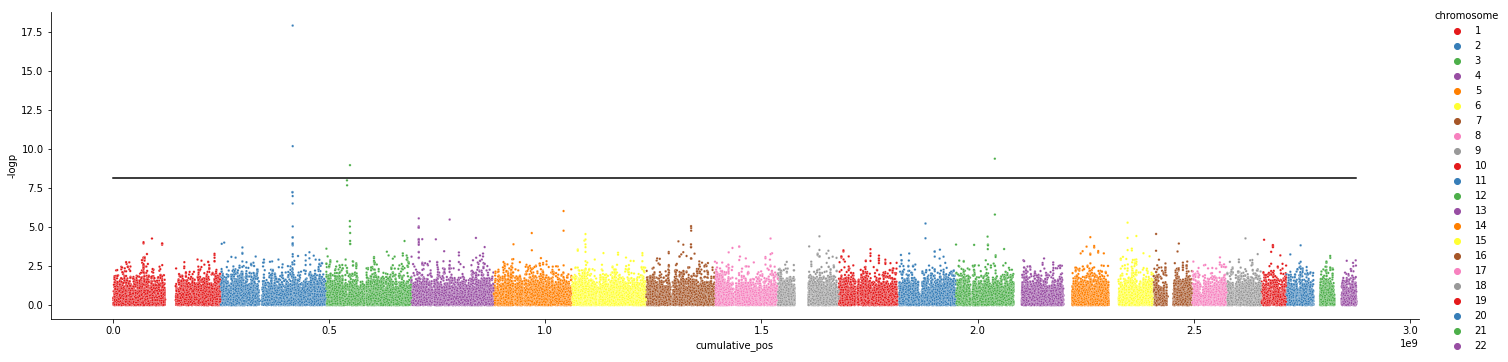

In [21]:
import seaborn as sns

sns.relplot(
    data = GWAS_data.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    s = 6,
    aspect = 4,
    hue = 'chromosome',
    palette = 'Set1'
)

# plot the line y > 10 
plt.plot([0, GWAS_data['cumulative_pos'].max()], [-np.log10(p_bonferroni), -np.log10(p_bonferroni)], color='black')

### Explain your result:
The Manhattan plot shows the relative significance of SNPs across the genome with respect to febrile seizures.

Significant disease associated SNPs found after Bonferroni correction appear to mainly be located in chromosome 2. There are also a couple disease associated SNPs in chromosome 3 and 12. This suggests that there may be mutations, particularly in chromosome 2, that are potential drivers of disease and should be investigated more. 